In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
sns.set_style('darkgrid')

In [2]:
train_data=pd.read_csv('Train.csv')
df=train_data.copy()

In [3]:
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [4]:
calc_mean = df.groupby(['CATEGORY'], axis=0).agg({'CRITICS_POINTS': 'mean'}).reset_index()
calc_mean.columns = ['CATEGORY','Category_Critics_pts']
df = df.merge(calc_mean, on=['CATEGORY'],how='left')

calc_mean2 = df.groupby(['CATEGORY'], axis=0).agg({'USER_POINTS': 'mean'}).reset_index()
calc_mean2.columns = ['CATEGORY','Category_User_pts']
df = df.merge(calc_mean2, on=['CATEGORY'],how='left')

calc_mean3 = df.groupby(['CONSOLE'], axis=0).agg({'CRITICS_POINTS': 'mean'}).reset_index()
calc_mean3.columns = ['CONSOLE','Console_Critics_pts']
df = df.merge(calc_mean3, on=['CONSOLE'],how='left')

calc_mean4 = df.groupby(['CONSOLE'], axis=0).agg({'USER_POINTS': 'mean'}).reset_index()
calc_mean4.columns = ['CONSOLE','Console_User_pts']
df = df.merge(calc_mean4, on=['CONSOLE'],how='left')

In [5]:
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions,Category_Critics_pts,Category_User_pts,Console_Critics_pts,Console_User_pts
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257,3.030737,0.258094,4.217333,0.598820
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050,4.637810,0.447938,4.175430,0.493555
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402,2.655283,0.253722,4.075946,0.116013
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964,4.460985,0.544185,3.790868,0.526375
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671,3.853440,0.362329,2.991475,0.222522


In [6]:
df.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions',
       'Category_Critics_pts', 'Category_User_pts', 'Console_Critics_pts',
       'Console_User_pts'],
      dtype='object')

In [7]:
df_num=df[['CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions',
       'Category_Critics_pts', 'Category_User_pts', 'Console_Critics_pts',
       'Console_User_pts']]

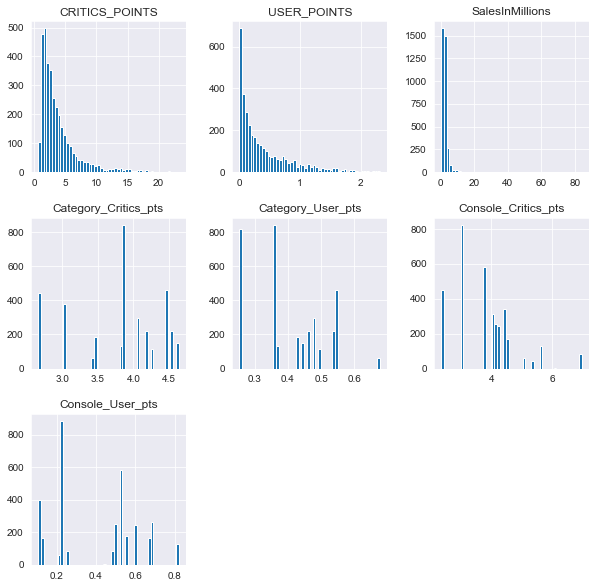

In [9]:
df_num.hist(bins=50,figsize=(10,10));

In [10]:
import re
def preprocess_text(data):
    text=str(data).lower()
    text=re.sub(r'[^a-z0-9]',' ',text)
    text=re.sub('/s+',' ',text)
    return text
df['CATEGORY']=df['CATEGORY'].apply(preprocess_text)
df['PUBLISHER']=df['PUBLISHER'].apply(preprocess_text)

In [12]:
#Combining The TExtual Features--->
df['GAME_INFO']=df['CONSOLE']+' '+df['CATEGORY']+' '+df['RATING']+' '+df['PUBLISHER']

In [13]:
df.drop(['CONSOLE','CATEGORY','RATING','PUBLISHER'],1,inplace=True)

In [14]:
df.head()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions,Category_Critics_pts,Category_User_pts,Console_Critics_pts,Console_User_pts,GAME_INFO
0,2860,2008,2.833333,0.303704,1.779257,3.030737,0.258094,4.217333,0.598820,ds role playing E nintendo
1,731,2012,13.200000,1.640000,0.215050,4.637810,0.447938,4.175430,0.493555,wii simulation E10+ konami digital entertainment
2,495,2019,4.562500,0.006410,0.534402,2.655283,0.253722,4.075946,0.116013,pc shooter M activision
3,2641,2002,4.181818,0.326923,1.383964,4.460985,0.544185,3.790868,0.526375,ps2 sports E electronic arts
4,811,2013,2.259259,0.032579,0.082671,3.853440,0.362329,2.991475,0.222522,ps3 action M activision


In [15]:
df.drop('ID',1,inplace=True)

In [16]:
import scipy.stats as stat
from matplotlib import pylab
from pylab import *

In [17]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) #1 row 2 columns
    df[feature].hist()
    plt.subplot(1,2,2) #1st row 2nd column 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

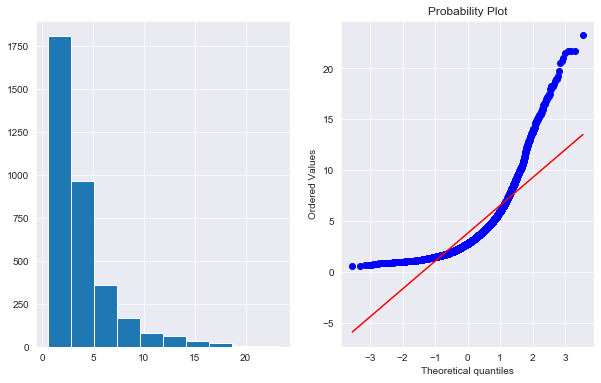

In [18]:
plot_data(df,'CRITICS_POINTS')

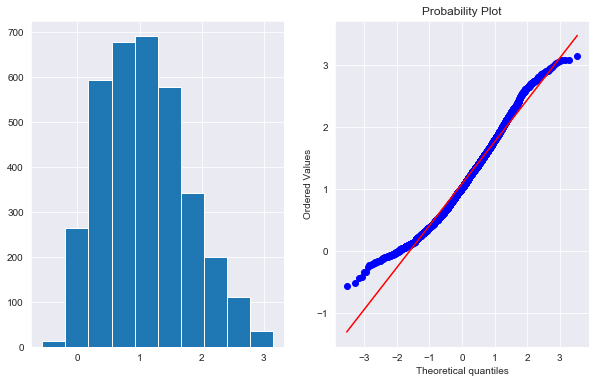

In [19]:

import numpy as np
df['Critics_log']=np.log(df['CRITICS_POINTS'])
plot_data(df,'Critics_log')

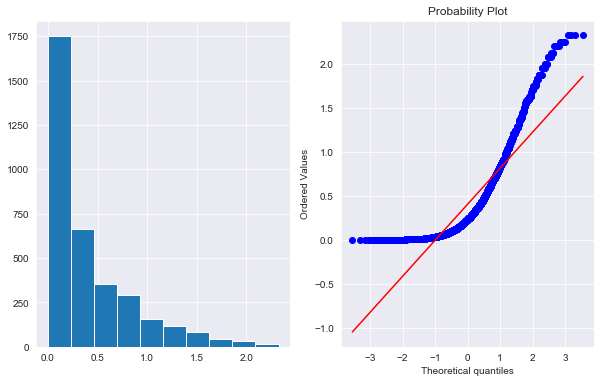

In [20]:
plot_data(df,'USER_POINTS')

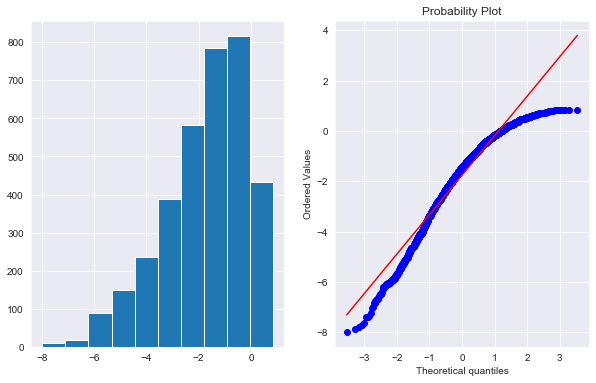

In [21]:
import numpy as np
df['Users_log']=np.log(df['USER_POINTS'])
plot_data(df,'Users_log')

In [22]:
df.drop(['CRITICS_POINTS','USER_POINTS'],1,inplace=True)

In [23]:
df.head()

,YEAR,SalesInMillions,Category_Critics_pts,Category_User_pts,Console_Critics_pts,Console_User_pts,GAME_INFO,Critics_log,Users_log
0,2008,1.779257,3.030737,0.258094,4.217333,0.598820,ds role playing E nintendo,1.041454,-1.191703
1,2012,0.215050,4.637810,0.447938,4.175430,0.493555,wii simulation E10+ konami digital entertainment,2.580217,0.494696
2,2019,0.534402,2.655283,0.253722,4.075946,0.116013,pc shooter M activision,1.517871,-5.049856
3,2002,1.383964,4.460985,0.544185,3.790868,0.526375,ps2 sports E electronic arts,1.430746,-1.118030
4,2013,0.082671,3.853440,0.362329,2.991475,0.222522,ps3 action M activision,0.815037,-3.424082


In [24]:
df.isnull().sum()

YEAR                    0
SalesInMillions         0
Category_Critics_pts    0
Category_User_pts       0
Console_Critics_pts     0
Console_User_pts        0
GAME_INFO               0
Critics_log             0
Users_log               0
dtype: int64

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer(ngram_range=(1,2),lowercase=True)
tf2=TfidfVectorizer(ngram_range=(1,3),lowercase=True)
game_info=tf1.fit_transform(df['GAME_INFO']).toarray()
# publisher=tf2.fit_transform(df['PUBLISHER']).toarray()

In [36]:
df.columns

Index(['YEAR', 'SalesInMillions', 'Category_Critics_pts', 'Category_User_pts',
       'Console_Critics_pts', 'Console_User_pts', 'GAME_INFO', 'Critics_log',
       'Users_log'],
      dtype='object')

In [38]:
df_num=df[['YEAR','Category_Critics_pts', 'Category_User_pts',
       'Console_Critics_pts', 'Console_User_pts','Critics_log',
       'Users_log']]
df_num.head()

,YEAR,Category_Critics_pts,Category_User_pts,Console_Critics_pts,Console_User_pts,Critics_log,Users_log
0,2008,3.030737,0.258094,4.217333,0.598820,1.041454,-1.191703
1,2012,4.637810,0.447938,4.175430,0.493555,2.580217,0.494696
2,2019,2.655283,0.253722,4.075946,0.116013,1.517871,-5.049856
3,2002,4.460985,0.544185,3.790868,0.526375,1.430746,-1.118030
4,2013,3.853440,0.362329,2.991475,0.222522,0.815037,-3.424082


In [39]:
df_num=np.array(df_num)

In [40]:
X=np.concatenate((df_num,game_info),1)
y=df.SalesInMillions

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(max_features='log2',n_estimators=500,verbose=1,n_jobs=-1)
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.4s finished


0.8954642647742119

In [43]:
from sklearn import metrics
y_pred=reg.predict(X_test)
metrics.r2_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


0.3758104228974105

In [44]:
from math import sqrt 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [45]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 200,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
print('RMSE:', sqrt(mean_squared_error(y_test,y_pred_lgbm)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4896
[LightGBM] [Info] Number of data points in the train set: 2629, number of used features: 258
[LightGBM] [Info] Start training from score 2.172701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.01, n_estimators=1500, random_state=42, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           7.1254           0.0794            2.73m
         2           3.8348           0.0070            2.45m
         3           7.0944           0.0058            2.49m
         4           4.5043           0.0741            2.48m
         5           7.5674           0.0053            2.49m
         6           4.2526           0.0720            2.49m
         7           4.2128           0.0714            2.47m
         8           7.1980           0.0062            2.50m
         9           6.2918           0.0091            2.49m
        10           6.7997           0.0069            2.51m
        20           3.7119           0.0576            2.53m
        30           5.9406           0.0033            2.54m
        40           5.1701           0.0002            2.54m
        50           4.6625           0.0285            2.51m
        60           4.6442           0.0015            2.48m
       